In [9]:
#rem "%matplotlib notebook" crashes with networkx
%matplotlib inline  
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Model based segmentation

As far, we considered the image segmentation as a bottom-up process, where connected pixels are grouped together based on some sort of rule based on gray levels, borders etc.

In some cases, one know *a priori* the object we are looking for.

An example was already given when looking for lines and circles using the Hough transform.

We will see in this chapter other method using this top-down approach.

## Live-wire

The live-wire algorithm is an interactive segmentation method that helps the user to delineate object borders in an image. The user select some points located near the object boundary and the algorithm connect them using a best path strategy.

> Barrett, W a, and E N Mortensen. 1997. “Interactive live-wire boundary
extraction.” Medical image analysis 1(4):331-41.

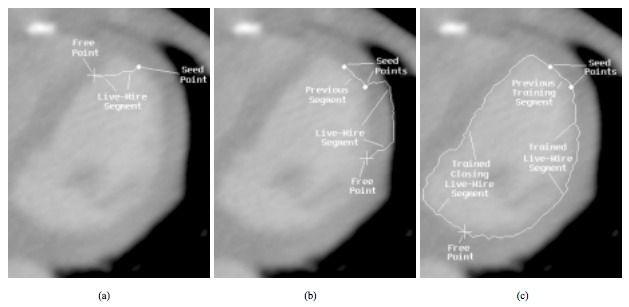

In [10]:
Image('http://homepages.ulb.ac.be/~odebeir/data/lifewire.png')

“intelligent scissors”

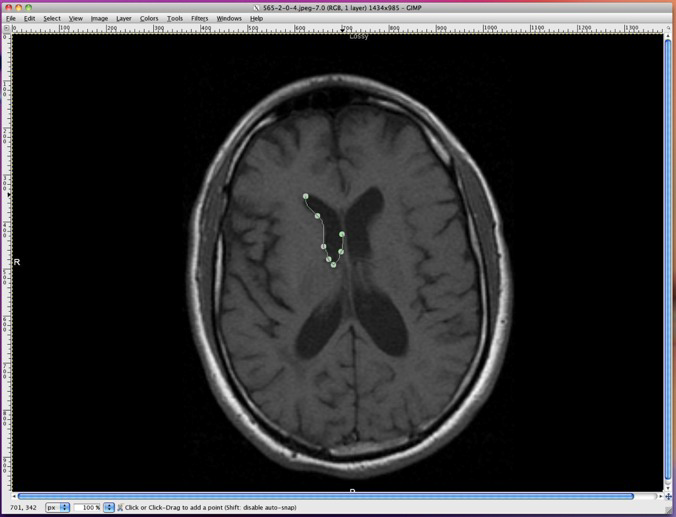

In [11]:
Image('http://homepages.ulb.ac.be/~odebeir/data/lw1.png')

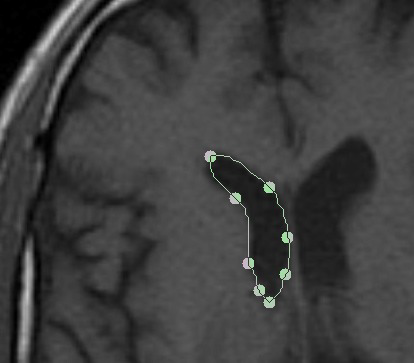

In [12]:
Image('http://homepages.ulb.ac.be/~odebeir/data/lw2.png')

Principe:
    
* user places seed points on the object/structure edge
* program compute locally the best path between these points
* should be fast enough to propose an interactive optimal path
* similar to the shortest problem, which is : d-finding the minimum cost path between one seed and all the possible image points

Move from one pixel to one of its neighbours

* graph = image latice
* search space = every pixel of the image
* Cost
* local (related to the edge detection etc. )
* euclidian distance from previous position

Local costs between points p and q

* Laplacian zero crossing, fZ,
* gradient magnitude,fG,
* and gradient direction, fD

$l(\bf p,bf q) = \omega_G . f_G(\bf q)+\omega_Z . f_Z(\bf q)+\omega_D . f_G(\bf p,\bf q)$

gradient magnitude, $f_G$: 

$f_G = 1 - \frac{G}{max(G)}$

Laplacian zero crossing, $f_Z$,

1 if sign change in the neighbourhood 

a ‘good’ pixel to place a border

gradient direction, $f_D$

$f_D(\bf p,\bf q) = \frac{2}{3\pi}\{[\cos(d_p(\bf p,\bf q))]^{-1}+[\cos(d_p(\bf p,\bf q))]^{-1}\}$

$\bf D(p)$ be the unit vector which is normal to the gradient direction at point

\bf D(p) = (G_y(\bf p),-G_x(\bf p))

where

are vector dot product and

$ d_p(\bf p,\bf q) = \bf D(\bf p) . L(\bf p,\bf q) $

$ d_a(\bf p,\bf q) = L(\bf p,\bf q) . \bf D(\bf q) $

$L(\bf p, \bf q)=\left \{\begin{array}{ll}
\bf q - \bf p,\quad \text{if} \quad  D(\bf p).(\bf q-\bf p) \ge 0\\
\bf p - \bf q,\quad \text{if} \quad  D(\bf p).(\bf q-\bf p) < 0\\
\end{array}
\right.$

The direction feature cost is low when the gradient direction of the two pixels are similar to each other and the link between them.

pros

* general, few initialization
* real-time
* direct control

cons

* resolution = pixel (> subpixel)
* contour depend on weight
* slow for 3D and high resolution


### Dijkstra shortest path algorithm

In [13]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('8Ls1RqHCOPw')

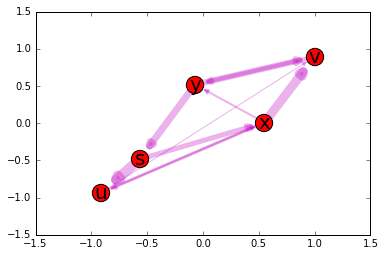

In [14]:
import networkx as nx
G=nx.DiGraph()
G.add_weighted_edges_from([('y','s',7),('y','v',6),('x','y',2),('x','u',3),('x','v',9),
                          ('s','x',5),('s','u',10),('u','x',2),('u','v',1),('v','y',4)])

pos=nx.spring_layout(G) 
edgewidth=[]
for (u,v,d) in G.edges(data=True):
    edgewidth.append(d['weight'])
    
nx.draw_networkx_nodes(G,pos=pos)
nx.draw_networkx_labels(G,pos=pos,font_size=20,font_family='sans-serif')
nx.draw_networkx_edges(G,pos,alpha=0.3,width=edgewidth, edge_color='m',arrows=True);

In [15]:
print(nx.dijkstra_path(G,source='s',target='v'))
print(nx.dijkstra_path(G,source='v',target='s'))

['s', 'x', 'u', 'v']
['v', 'y', 's']
